In [1]:
import pandas as pd
from mlchartist.features import transform_file, build_data, save_ticker
from mlchartist.array_builder import generate_test_window
from mlchartist.features import proper_name, to_date, proper_col, get_indicators, calculate_past_returns, calculate_real_returns
import os

### Build nasdaq 100

In [89]:
ndx_df = pd.read_csv('../../raw_data/^ndx.txt')

In [90]:
ndx_df.columns = [proper_name(col) for col in ndx_df.columns]

In [91]:
ndx_df['date'] = to_date(ndx_df, 'date')

In [92]:
ndx_df.drop(columns=['per', 'time', 'openint'], inplace=True)

In [93]:
ndx_df = get_indicators(ndx_df)

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [94]:
ndx_df = calculate_past_returns(ndx_df)

In [95]:
ndx_df = calculate_real_returns(ndx_df)

In [96]:
ndx_df = ndx_df.tail(3500).fillna(value=-999).drop(columns = ['open', 'high','low','close', 'vol']).reset_index(drop=True)[['date', 'ticker', '1D_past_return']]

In [97]:
ndx_df

,date,ticker,1D_past_return
0,2007-03-22,^NDX,-0.003654
1,2007-03-23,^NDX,-0.003173
2,2007-03-26,^NDX,0.004966
3,2007-03-27,^NDX,-0.007221
4,2007-03-28,^NDX,-0.010833
...,...,...,...
3495,2021-02-08,^NDX,0.006694
3496,2021-02-09,^NDX,-0.000580
3497,2021-02-10,^NDX,-0.002324
3498,2021-02-11,^NDX,0.005791


In [98]:
DB_LAST_DATE = '2021-02-12' # Last date in companies csvs

In [99]:
ndx_df = ndx_df[ndx_df['date'] <= DB_LAST_DATE].sort_values(by="date",ascending=True).set_index("date").last('180D').rename(columns={'1D_past_return': 'NDX'}).drop(columns=['ticker'])

In [100]:
ndx_df # reference dataframe with all days with Nasdaq 100 index 1D returns for the last 2 years

,NDX
date,
2020-08-17,0.011117
2020-08-18,0.009785
2020-08-19,-0.007052
2020-08-20,0.013995
2020-08-21,0.006806
...,...
2021-02-08,0.006694
2021-02-09,-0.000580
2021-02-10,-0.002324


In [14]:
nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

nasdaq100_list = list(nasdaq100.values.flatten())

In [15]:
nasdaq100_list

['ATVI',
 'ADBE',
 'AMD',
 'ALGN',
 'ALXN',
 'AMZN',
 'AMGN',
 'AAL',
 'ADI',
 'AAPL',
 'AMAT',
 'ASML',
 'ADSK',
 'ADP',
 'AVGO',
 'BIDU',
 'BIIB',
 'BMRN',
 'CDNS',
 'CERN',
 'CHKP',
 'CHTR',
 'TCOM',
 'CTAS',
 'CSCO',
 'CTXS',
 'CMCSA',
 'COST',
 'CSX',
 'CTSH',
 'DLTR',
 'EA',
 'EBAY',
 'EXC',
 'EXPE',
 'FAST',
 'FB',
 'FISV',
 'GILD',
 'GOOG',
 'GOOGL',
 'HAS',
 'HSIC',
 'ILMN',
 'INCY',
 'INTC',
 'INTU',
 'ISRG',
 'IDXX',
 'JBHT',
 'JD',
 'KLAC',
 'KHC',
 'LRCX',
 'LBTYA',
 'LBTYK',
 'LULU',
 'MELI',
 'MAR',
 'MCHP',
 'MDLZ',
 'MNST',
 'MSFT',
 'MU',
 'MXIM',
 'MYL',
 'NTAP',
 'NFLX',
 'NTES',
 'NVDA',
 'NXPI',
 'ORLY',
 'PAYX',
 'PCAR',
 'BKNG',
 'PYPL',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SIRI',
 'SWKS',
 'SBUX',
 'NLOK',
 'SNPS',
 'TTWO',
 'TSLA',
 'TXN',
 'TMUS',
 'ULTA',
 'UAL',
 'VRSN',
 'VRSK',
 'VRTX',
 'WBA',
 'WDC',
 'WDAY',
 'WYNN',
 'XEL',
 'XLNX']

In [16]:
len(nasdaq100_list)

100

In [18]:
def transform_current_file(fp):
    df = pd.read_csv(fp)
    df.columns = [proper_name(col) for col in df.columns]
    df['date'] = to_date(df, 'date')
    df = proper_col(df)
    df.drop(columns=['per', 'time', 'openint'], inplace=True)
    df = get_indicators(df)
    df_final = calculate_real_returns(df)
    df_final = calculate_past_returns(df_final)
    df_final = df_final.sort_values(by='date', ascending=False)
    df_final = df_final.head(3500).fillna(value=-999).drop(columns = ['open', 'high','low','close', 'vol']).reset_index(drop=True)
    return df_final
    

In [19]:
raw_data_folder = '../../raw_data/data_current/daily/us/nasdaq stocks/'
destination_path='../../raw_data/processed_current/'
len_hist = 60

In [22]:
files_changed = 0
for subdir, dirs, files in os.walk(raw_data_folder):
    for filename in files:
        if filename[:-7].upper() in nasdaq100_list:
            filepath = subdir + os.sep + filename
            if not subdir.endswith('.ipynb_checkpoints'):
                if filename.endswith('txt'):
                    with open(filepath) as f:
                        rows_num = sum(1 for line in f)
                        if rows_num >= len_hist:
                            df = transform_current_file(filepath)
                            new_name = filename[:-7] + '.csv'
                            targetpath = destination_path + os.sep + new_name
                            save_ticker(df, targetpath)
                            files_changed += 1

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])


### Build a dataframe with 1D returns for all days for the last 2 years for all companies of Nasdaq 100

In [ ]:
del nasdaq_100_returns

In [27]:
nasdaq_100_returns = ndx_df.copy()

In [28]:
del nasdaq100_list[65]

In [29]:
for ticker in nasdaq100_list:
    ticker_path = '../../raw_data/processed_current/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path)[['date', '1D_past_return']].set_index('date').rename(columns={'1D_past_return': ticker})
    nasdaq_100_returns = nasdaq_100_returns.merge(ticker_df, how='left', left_index=True, right_index=True)

In [30]:
nasdaq_100_returns

,NDX,ATVI,ADBE,AMD,ALGN,ALXN,AMZN,AMGN,AAL,ADI,...,UAL,VRSN,VRSK,VRTX,WBA,WDC,WDAY,WYNN,XEL,XLNX
date,,,,,,,,,,,,,,,,,,,,,
2020-08-17,0.011117,0.019776,0.008892,0.013776,0.008340,-0.002137,0.010924,0.013794,-0.053263,0.002154,...,-0.049198,-0.002605,-0.000424,0.024505,-0.017510,-0.003917,0.020156,-0.017416,-0.007490,-0.006380
2020-08-18,0.009785,0.013904,0.026418,-0.009221,-0.011146,0.005450,0.040875,-0.006219,-0.001585,0.003697,...,-0.012209,0.001161,0.000318,-0.009239,0.001268,-0.025000,0.034118,-0.022395,-0.002843,-0.013514
2020-08-19,-0.007052,-0.013834,-0.003236,-0.006980,-0.014899,-0.015584,-0.015701,-0.004158,0.006349,0.002313,...,0.013537,-0.004058,-0.010022,-0.004570,-0.012512,-0.007491,-0.001879,-0.004533,-0.006020,-0.008064
2020-08-20,0.013995,0.024579,0.035649,0.020718,-0.014129,-0.007178,0.011314,-0.007338,-0.014196,-0.005896,...,-0.011324,0.009750,-0.007392,0.005036,-0.013400,-0.010160,0.016318,-0.012060,-0.008182,-0.009892
2020-08-21,0.006806,-0.009346,-0.010993,0.012565,-0.009958,-0.004556,-0.003836,-0.004546,-0.027200,-0.012207,...,-0.029662,-0.006870,-0.001133,-0.000553,-0.006294,-0.011437,-0.008594,0.031266,0.008690,0.006133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,0.006694,-0.004133,0.003333,0.040614,-0.029027,0.003768,-0.008714,0.005286,0.033741,0.029847,...,0.052444,0.005012,0.007630,-0.004135,0.002409,0.039839,0.033491,0.003590,-0.018758,0.036269
2021-02-09,-0.000580,0.015219,0.004638,-0.006122,0.020849,0.004984,-0.005399,-0.003901,-0.018571,-0.002285,...,-0.023224,-0.001147,0.008737,-0.002566,0.001402,-0.006922,0.009458,-0.034324,-0.002088,-0.004101
2021-02-10,-0.002324,0.000292,-0.006814,0.015840,-0.014992,-0.004444,-0.005573,0.007663,-0.001720,0.002486,...,0.010619,0.014279,0.001627,-0.006033,0.032200,-0.021073,-0.004648,0.026989,0.002576,0.016329


In [31]:
nasdaq_100_returns.fillna(value=0.0, inplace=True)

In [32]:
nasdaq_100_returns.to_csv('../../raw_data/backtest.csv')

In [33]:
nasdaq_100_returns.iloc[-10::-10].index # generate indices for backtest windows

DatetimeIndex(['2021-02-01', '2021-01-15', '2020-12-31', '2020-12-16',
               '2020-12-02', '2020-11-17', '2020-11-03', '2020-10-20',
               '2020-10-06', '2020-09-22', '2020-09-08', '2020-08-24'],
              dtype='datetime64[ns]', name='date', freq=None)

In [34]:
dates_to_predict = nasdaq_100_returns.iloc[-10::-10].index

In [35]:
nasdaq100_list

['ATVI',
 'ADBE',
 'AMD',
 'ALGN',
 'ALXN',
 'AMZN',
 'AMGN',
 'AAL',
 'ADI',
 'AAPL',
 'AMAT',
 'ASML',
 'ADSK',
 'ADP',
 'AVGO',
 'BIDU',
 'BIIB',
 'BMRN',
 'CDNS',
 'CERN',
 'CHKP',
 'CHTR',
 'TCOM',
 'CTAS',
 'CSCO',
 'CTXS',
 'CMCSA',
 'COST',
 'CSX',
 'CTSH',
 'DLTR',
 'EA',
 'EBAY',
 'EXC',
 'EXPE',
 'FAST',
 'FB',
 'FISV',
 'GILD',
 'GOOG',
 'GOOGL',
 'HAS',
 'HSIC',
 'ILMN',
 'INCY',
 'INTC',
 'INTU',
 'ISRG',
 'IDXX',
 'JBHT',
 'JD',
 'KLAC',
 'KHC',
 'LRCX',
 'LBTYA',
 'LBTYK',
 'LULU',
 'MELI',
 'MAR',
 'MCHP',
 'MDLZ',
 'MNST',
 'MSFT',
 'MU',
 'MXIM',
 'NFLX',
 'NTES',
 'NVDA',
 'NXPI',
 'ORLY',
 'PAYX',
 'PCAR',
 'BKNG',
 'PYPL',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SIRI',
 'SWKS',
 'SBUX',
 'NLOK',
 'SNPS',
 'TTWO',
 'TSLA',
 'TXN',
 'TMUS',
 'ULTA',
 'UAL',
 'VRSN',
 'VRSK',
 'VRTX',
 'WBA',
 'WDC',
 'WDAY',
 'WYNN',
 'XEL',
 'XLNX']

### Build a dataframe with predictions for all companies for provided backtest windows

In [36]:
from tensorflow.keras import models

In [37]:
model = models.load_model('../../models/Nasdaq_100_150k/')

In [38]:
import joblib

In [39]:
scaler = joblib.load('../../models/scaler')

In [40]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 530

for ticker in nasdaq100_list:
    ticker_path = '../../raw_data/processed_current/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)

In [41]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024

joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
TARGET_COLS = ['10D_return_bin']



In [42]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,ATVI,2021-02-12,74.034286,97.378885,94.008077,6.456544e+08,2115535113,2.596143,30.709946,35.666325,...,2.607827,-999.000000,-999.000000,-999.000000,0.005521,0.021651,0.140769,False,False,False
1,ATVI,2021-02-11,73.254653,93.820810,91.760872,6.429070e+08,2112511311,2.661231,29.204549,37.470466,...,2.362836,-999.000000,-999.000000,-999.000000,0.004671,0.113940,0.143680,False,False,False
2,ATVI,2021-02-10,72.611612,90.824537,87.495344,6.434730e+08,2109204847,2.737864,27.301938,37.045888,...,2.110693,-999.000000,-999.000000,-999.000000,0.000292,0.107686,0.158904,False,False,False
3,ATVI,2021-02-09,72.573342,90.637270,85.102487,6.416680e+08,2104460026,2.779623,25.411127,39.296213,...,1.862309,-999.000000,-999.000000,-999.000000,0.015219,0.093105,0.112037,False,False,False
4,ATVI,2021-02-08,70.616238,81.024226,74.341761,6.404361e+08,2099160911,2.784979,23.374868,40.331789,...,1.636154,-999.000000,-999.000000,-999.000000,-0.004133,0.106869,0.083405,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,XLNX,2019-01-14,57.278657,88.452582,90.203831,9.191121e+08,1021087995,3.154245,20.467816,24.169280,...,0.344055,-0.001205,0.207767,0.309399,-0.003974,0.008900,0.073766,False,True,True
526,XLNX,2019-01-11,58.147160,91.271180,86.856573,9.180728e+08,1022705230,3.283956,19.326010,25.000372,...,0.194765,0.028568,0.202627,0.267735,0.006083,0.039697,0.078551,True,True,True
527,XLNX,2019-01-10,57.231031,90.887733,80.421771,9.174536e+08,1019959138,3.320645,18.096374,23.924957,...,0.044926,0.020665,0.221335,0.262118,0.017232,0.081260,0.060452,True,True,True
528,XLNX,2019-01-09,54.665075,78.410807,82.037969,9.159131e+08,1017599912,3.374387,17.138836,24.734933,...,-0.083612,0.018553,0.193826,0.273090,0.008980,0.022913,0.120730,True,True,True


In [44]:
result_df = pd.DataFrame(index=dates_to_predict, columns=joined_df['ticker'].unique())

In [45]:
comp_count = 0
for cmp in result_df.columns:
    single_comp = joined_df[joined_df['ticker'] == cmp]
    for dt in dates_to_predict:
        test_x, test_y = generate_test_window(test_df=single_comp,
                        date= dt,
                        fitted_scaler=scaler,
                        time_window=30,
                        input_cols=INPUT_COLS,
                        target_col=TARGET_COLS)
        prediction = model.predict(test_x)[0]
        if prediction > .5:
            result_df.loc[dt, cmp] = prediction[0]
        else:
            result_df.loc[dt, cmp] = 0
    comp_count +=1
    print(f'Saved all dates predictions for {cmp} --> {comp_count} out of {len(result_df.columns)}')

Saved all dates predictions for ATVI --> 1 out of 98
Saved all dates predictions for ADBE --> 2 out of 98
Saved all dates predictions for AMD --> 3 out of 98
Saved all dates predictions for ALGN --> 4 out of 98
Saved all dates predictions for ALXN --> 5 out of 98
Saved all dates predictions for AMZN --> 6 out of 98
Saved all dates predictions for AMGN --> 7 out of 98
Saved all dates predictions for AAL --> 8 out of 98
Saved all dates predictions for ADI --> 9 out of 98
Saved all dates predictions for AAPL --> 10 out of 98
Saved all dates predictions for AMAT --> 11 out of 98
Saved all dates predictions for ASML --> 12 out of 98
Saved all dates predictions for ADSK --> 13 out of 98
Saved all dates predictions for ADP --> 14 out of 98
Saved all dates predictions for AVGO --> 15 out of 98
Saved all dates predictions for BIDU --> 16 out of 98
Saved all dates predictions for BIIB --> 17 out of 98
Saved all dates predictions for BMRN --> 18 out of 98
Saved all dates predictions for CDNS --> 

In [46]:
result_transposed = result_df.T

In [47]:
result_transposed # a dataframe with all probabilities (higher than .5) of positive returns for all widows, when probability lower than .5 --> 0

date,2021-02-01,2021-01-15,2020-12-31,2020-12-16,2020-12-02,2020-11-17,2020-11-03,2020-10-20,2020-10-06,2020-09-22,2020-09-08,2020-08-24
ATVI,0.543288,0,0.538396,0.98197,0.990311,0.983058,0,0,0.88009,0,0.993198,0
ADBE,0,0,0.795332,0.80051,0.987868,0.94143,0.759153,0,0.920162,0,0.616117,0.678378
AMD,0.659577,0.889841,0.73889,0,0.728284,0.815094,0.966997,0,0,0.782,0,0
ALGN,0.969264,0,0.678399,0.638692,0.88135,0.623063,0,0.980867,0.906572,0,0.978273,0.771483
ALXN,0.850897,0,0.989472,0,0.95508,0,0.976018,0,0.982339,0.981831,0.739949,0
...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.773094,0.968744,0.716065,0,0.933671,0.980857,0.97373,0,0.957956,0,0,0.946106
WDAY,0.889812,0.939384,0.908197,0.980877,0,0,0.794387,0,0.674918,0.917796,0,0.698378
WYNN,0.985248,0,0,0,0.983485,0.873891,0.949792,0.986955,0,0.591872,0,0
XEL,0.571187,0,0,0.752379,0,0,0.623999,0.86673,0,0.87606,0,0


In [48]:
def built_comp_list(result_transposed, n=1):
    cmp_dict = {}
    for dt in result_transposed.columns:
        dt_serie = result_transposed[dt].sort_values(ascending=False)
        dt_serie_non_zero = dt_serie[dt_serie != 0]
        comp_list = list(dt_serie_non_zero.head(n).index)
        cmp_dict[dt.strftime('%Y-%m-%d')] = comp_list
    return cmp_dict
    

In [49]:
import numpy as np

In [50]:
def bckt_time_window(dt, bck_test_df, comp_list):
    comp_series = {}
    for comp in bck_test_df.columns:
        if comp in comp_list:
            comp_series[comp] = bck_test_df[comp][dt:].head(10).sort_index(ascending=False)
        else:
            comp_series[comp] = pd.Series(index=bck_test_df[dt:].head(10).index, data = np.nan)
    return pd.DataFrame(comp_series)

In [61]:
N = 5

In [62]:
top_n = built_comp_list(result_transposed, n=N)

In [63]:
top_n

{'2021-02-01': ['HAS', 'AAPL', 'NLOK', 'WYNN', 'MAR'],
 '2021-01-15': ['MSFT', 'JD', 'FISV', 'EBAY', 'ROST'],
 '2020-12-31': ['ALXN', 'FAST', 'SWKS', 'BIIB', 'MDLZ'],
 '2020-12-16': ['VRSK', 'MNST', 'CDNS', 'AAPL', 'SWKS'],
 '2020-12-02': ['ATVI', 'ILMN', 'SBUX', 'ADBE', 'SNPS'],
 '2020-11-17': ['ADI', 'TMUS', 'TXN', 'LBTYK', 'KHC'],
 '2020-11-03': ['CMCSA', 'ADI', 'FAST', 'CTSH', 'REGN'],
 '2020-10-20': ['XLNX', 'CSX', 'WYNN', 'EXPE', 'ALGN'],
 '2020-10-06': ['AMAT', 'CERN', 'JD', 'MXIM', 'BIDU'],
 '2020-09-22': ['TCOM', 'HAS', 'QCOM', 'ISRG', 'BIIB'],
 '2020-09-08': ['ATVI', 'MU', 'LRCX', 'NTES', 'PAYX'],
 '2020-08-24': ['BMRN', 'EXPE', 'ROST', 'ULTA', 'AVGO']}

In [64]:
window_list = []
for dt, comp_list in top_n.items():
    window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

In [65]:
avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

In [66]:
returns = avg_ret.merge(nasdaq_100_returns['NDX'], left_index=True, right_index=True, how='inner') +1

In [67]:
print(returns.tail(50))

            avg_return       NDX
date                            
2020-12-02    0.998379  1.000087
2020-12-03    1.014489  1.000861
2020-12-04    1.015100  1.004921
2020-12-07    1.001770  1.005427
2020-12-08    1.003742  1.003116
2020-12-09    0.983316  0.978547
2020-12-10    1.013110  1.003000
2020-12-11    0.997340  0.997877
2020-12-14    1.015512  1.007014
2020-12-15    1.008815  1.010729
2020-12-16    1.010531  1.005735
2020-12-17    1.007923  1.006623
2020-12-18    1.011094  0.998912
2020-12-21    0.997157  0.996238
2020-12-22    1.009613  1.002151
2020-12-23    0.997988  0.994935
2020-12-24    1.006800  1.004574
2020-12-28    1.019886  1.010058
2020-12-29    0.990796  1.000361
2020-12-30    1.004337  1.000146
2020-12-31    1.001875  1.003341
2021-01-04    0.989626  0.984977
2021-01-05    1.013795  1.008485
2021-01-06    1.007426  0.986016
2021-01-07    1.007015  1.025050
2021-01-08    1.010392  1.012800
2021-01-11    1.004186  0.984532
2021-01-12    0.999285  0.999194
2021-01-13

In [68]:
returns.isnull().sum()

avg_return    0
NDX           0
dtype: int64

In [69]:
final_ret = returns.fillna(value=1)

<AxesSubplot:xlabel='date'>

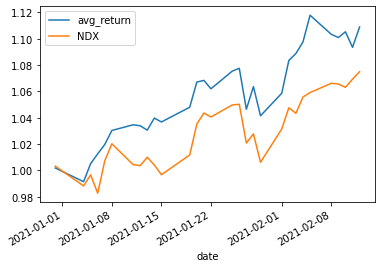

In [74]:
final_ret.tail(30).cumprod().plot()